In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("Set up complete")

Set up complete


In [3]:
data = pd.read_csv("boston_house.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [18]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [19]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 59.3 KB


In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Spliting Data into Independent and Dependent Data -

In [13]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [14]:
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT',]]

y = data["MEDV"]

In [15]:
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [16]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

#### Split Data into Train and Test Data

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [27]:
X_train.shape

(404, 13)

In [28]:
X_test.shape

(102, 13)

In [29]:
y_train.shape,y_test.shape

((404,), (102,))

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [33]:
X_train[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83


In [35]:
X_test[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07


In [36]:
y_train[:3]

477    12.0
15     19.9
332    19.4
Name: MEDV, dtype: float64

In [37]:
y_train_predict[:3]

array([10.96952405, 19.41196567, 23.06419602])

In [38]:
y_test[:3]

173    23.6
274    32.4
491    13.6
Name: MEDV, dtype: float64

In [39]:
y_test_predict[:3]

array([28.99672362, 36.02556534, 14.81694405])

#### Errors -

In [45]:
mse = mean_squared_error(y_train,y_train_predict)
mse

np.float64(21.641412753226316)

In [54]:
rmse = np.sqrt(mean_squared_error(y_train,y_train_predict))
rmse

np.float64(4.6520331848801675)

In [49]:
mae = mean_absolute_error(y_train,y_train_predict)
mae

np.float64(3.314771626783229)

In [50]:
r2 = r2_score(y_train,y_train_predict)
r2

0.7508856358979672

#### Model Evaluation (Linear Regression ) -

In [131]:
def training_evaluation(actual,predict):
    print(f"mean_squared_error : {mse}")
    print(f"root_mean_squared_error : {rmse}")
    print(f"mean_absolute_error : {mae}")
    print(f"r2_score : {r2}")

    plt.scatter(actual,predict,color = "b")
    plt.plot([actual.min(),actual.max()],[predict.min(),predict.max()],color = "k",lw = 2,ls = "--")
    plt.title("Best Fit Line using Linear Regression - Training Data")
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    plt.legend()
    plt.show()

mean_squared_error : 21.641412753226316
root_mean_squared_error : 4.6520331848801675
mean_absolute_error : 3.314771626783229
r2_score : 0.7508856358979672


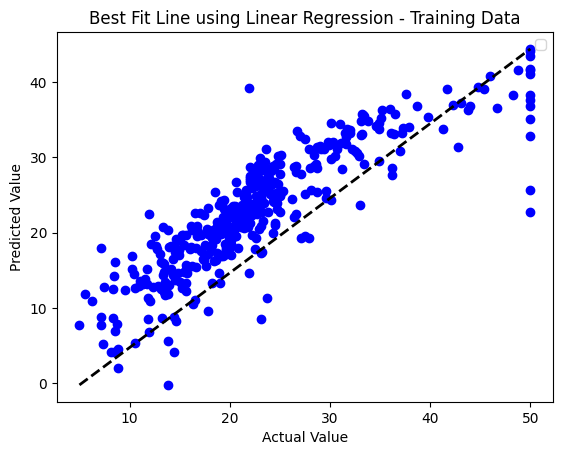

In [132]:
training_evaluation(y_train,y_train_predict)

In [129]:
def testing_evaluation(actual,predict):
    print(f"mse : {mean_squared_error(actual,predict)}")
    print(f"rmse : {np.sqrt(mean_squared_error(actual,predict))}")
    print(f"mae : {mean_absolute_error(actual,predict)}")
    print(f"r2score : {r2_score(actual,predict)}")

    plt.scatter(actual,predict,color = "pink")
    plt.plot([actual.min(),actual.max()],[predict.min(),predict.max()],color = "k",lw = 2,ls = "--")
    plt.title("Best Fit Line using Linear Regression - Testing Data")
    plt.xlabel("Actual Value")
    plt.ylabel("Predict Value")
    plt.legend()
    plt.show()

mse : 24.291119474973545
rmse : 4.9286021826653394
mae : 3.1890919658878487
r2score : 0.6687594935356316


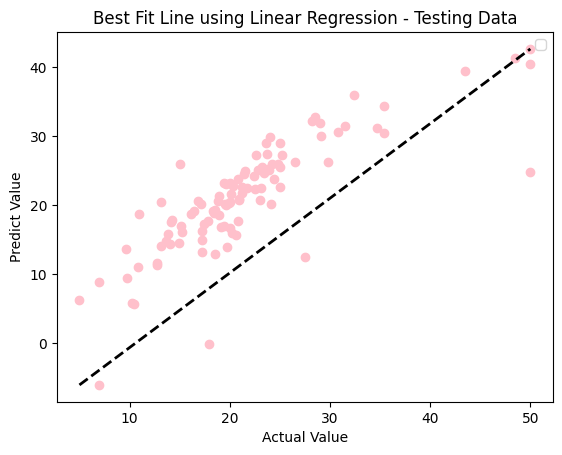

In [130]:
testing_evaluation(y_test,y_test_predict)

#### Polynomial Regression -

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
poly = PolynomialFeatures(degree = 2)

In [75]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [71]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [72]:
X_train_poly

array([[1.00000000e+00, 1.50234000e+01, 0.00000000e+00, ...,
        1.22136270e+05, 8.70554680e+03, 6.20508100e+02],
       [1.00000000e+00, 6.27390000e-01, 0.00000000e+00, ...,
        1.56515184e+05, 3.35090140e+03, 7.17409000e+01],
       [1.00000000e+00, 3.46600000e-02, 3.50000000e+01, ...,
        1.31225062e+05, 2.83641750e+03, 6.13089000e+01],
       ...,
       [1.00000000e+00, 1.50100000e-02, 8.00000000e+01, ...,
        1.52834084e+05, 2.34173060e+03, 3.58801000e+01],
       [1.00000000e+00, 1.11604000e+01, 0.00000000e+00, ...,
        1.20670225e+04, 2.55620950e+03, 5.41492900e+02],
       [1.00000000e+00, 2.28760000e-01, 0.00000000e+00, ...,
        5.01264000e+03, 7.52604000e+02, 1.12996900e+02]])

In [73]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247.0,18.5,395.99,12.86


In [76]:
X_test_poly

array([[1.00000000e+00, 9.17800000e-02, 0.00000000e+00, ...,
        1.56420250e+05, 3.57532000e+03, 8.17216000e+01],
       [1.00000000e+00, 5.64400000e-02, 4.00000000e+01, ...,
        1.57529610e+05, 1.40105700e+03, 1.24609000e+01],
       [1.00000000e+00, 1.05740000e-01, 0.00000000e+00, ...,
        1.52185812e+05, 7.04928770e+03, 3.26524900e+02],
       ...,
       [1.00000000e+00, 1.40507000e+01, 0.00000000e+00, ...,
        1.22850250e+03, 7.43761000e+02, 4.50288400e+02],
       [1.00000000e+00, 5.18800000e-02, 0.00000000e+00, ...,
        1.56808080e+05, 5.09243140e+03, 1.65379600e+02],
       [1.00000000e+00, 9.51200000e-02, 0.00000000e+00, ...,
        1.46865233e+05, 3.42607620e+03, 7.99236000e+01]])

In [83]:
poly = LinearRegression()

In [84]:
poly.fit(X_train_poly,y_train)

LinearRegression()

In [85]:
y_train_pred_poly = poly.predict(X_train_poly)
y_test_pred_poly = poly.predict(X_test_poly)

In [86]:
X_train[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83


In [87]:
y_train[:3]

477    12.0
15     19.9
332    19.4
Name: MEDV, dtype: float64

In [89]:
y_train_predict[:3]

array([10.96952405, 19.41196567, 23.06419602])

In [88]:
y_train_pred_poly[:3]

array([11.82400447, 19.01728946, 19.09960228])

In [105]:
def training_evaluation(actual,predict):
    print(f"mse : {mean_squared_error(actual,predict)}")
    print(f"rmse : {np.sqrt(mean_squared_error(actual,predict))}")
    print(f"mae : {mean_absolute_error(actual,predict)}")
    print(f"r2score : {r2_score(actual,predict)}")

    plt.scatter(actual,predict,color = "y")
    plt.plot([actual.min(),actual.max()],[predict.min(),predict.max()],color = "k",lw = 2,ls = "--")
    plt.title("Best Fit Line using Linear Regression - Training Data")
    plt.xlabel("Actual Value")
    plt.ylabel("Predict Value")
    plt.legend()
    plt.show()

mse : 21.641412753226316
rmse : 4.6520331848801675
mae : 3.314771626783229
r2score : 0.7508856358979672


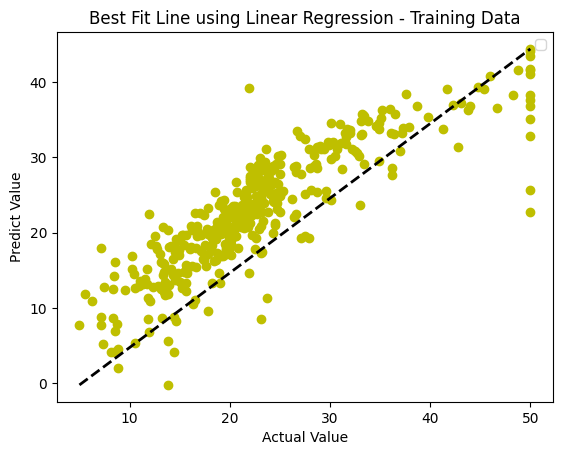

In [106]:
training_evaluation(y_train,y_train_predict)

In [126]:
def training_evaluation(actual,predict):
    print(f"mse : {mean_squared_error(actual,predict)}")
    print(f"rmse : {np.sqrt(mean_squared_error(actual,predict))}")
    print(f"mae : {mean_absolute_error(actual,predict)}")
    print(f"r2score : {r2_score(actual,predict)}")

    plt.scatter(actual,predict,color = "b")
    plt.plot([actual.min(),actual.max()],[predict.min(),predict.max()],color = "k",lw = 2,ls = "--")
    plt.title("Best Fit Line using Polynomial Regression - Training Data")
    plt.xlabel("Actual Value")
    plt.ylabel("Predict Value")
    plt.legend()
    plt.show()

mse : 5.626164362915981
rmse : 2.3719537016805328
mae : 1.839527099055819
r2score : 0.9352372059262911


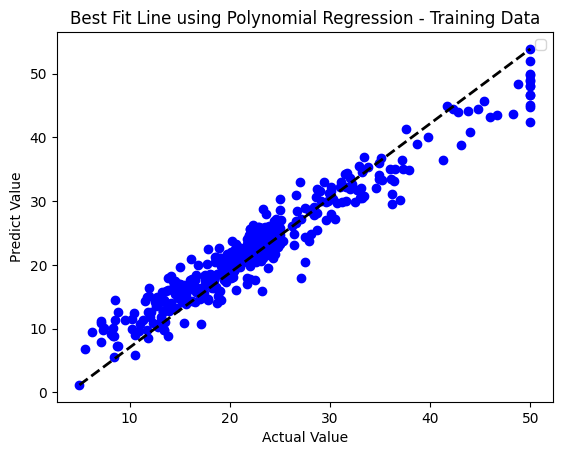

In [127]:
training_evaluation(y_train,y_train_pred_poly)

In [125]:
def testing_evaluation(actual,predict):
    print(f"mse : {mean_squared_error(actual,predict)}")
    print(f"rmse : {np.sqrt(mean_squared_error(actual,predict))}")
    print(f"mae : {mean_absolute_error(actual,predict)}")
    print(f"r2score : {r2_score(actual,predict)}")

    plt.scatter(actual,predict,color = "pink")
    plt.plot([actual.min(),actual.max()],[predict.min(),predict.max()],color = "k",lw = 2,ls = "--")
    plt.title("Best Fit Line using Linear Regression - Testing Data")
    plt.xlabel("Actual Value")
    plt.ylabel("Predict Value")
    plt.legend()
    plt.show()

mse : 24.291119474973545
rmse : 4.9286021826653394
mae : 3.1890919658878487
r2score : 0.6687594935356316


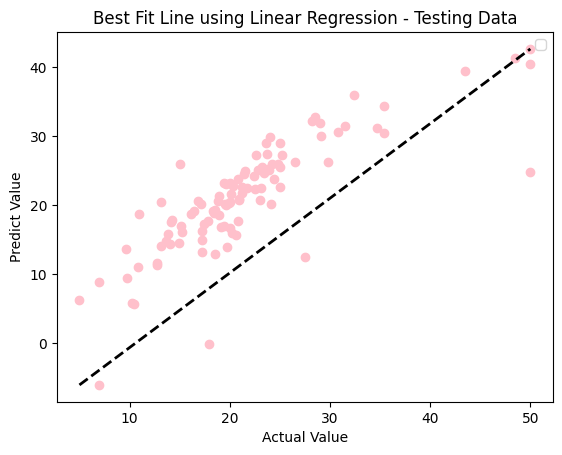

In [128]:
testing_evaluation(y_test,y_test_predict)

In [123]:
def testing_evaluation(actual,predict):
    print(f"mse : {mean_squared_error(actual,predict)}")
    print(f"rmse : {np.sqrt(mean_squared_error(actual,predict))}")
    print(f"mae : {mean_absolute_error(actual,predict)}")
    print(f"r2score : {r2_score(actual,predict)}")

    plt.scatter(actual,predict,color = "pink")
    plt.plot([actual.min(),actual.max()],[predict.min(),predict.max()],color = "k",lw = 2,ls = "--")
    plt.title("Best Fit Line using Polynomial Regression - Testing Data")
    plt.xlabel("Actual Value")
    plt.ylabel("Predict Value")
    plt.legend()
    plt.show()

mse : 14.566436062347284
rmse : 3.816600065810837
mae : 2.643128861866744
r2score : 0.8013679993775582


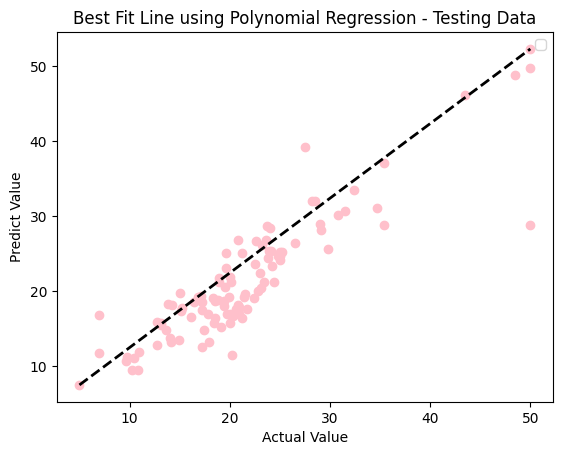

In [124]:
testing_evaluation(y_test,y_test_pred_poly)